In [1]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librerías de scikit-learn para manejo de regresión lineal/logística.
from sklearn import linear_model

# Importamos librerías de scikit-learn para uso de clasificación de bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

# Importamos librerías de scikit-learn para clusterización con k-means
from sklearn.cluster import KMeans

# Importamos librerías para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

In [24]:
# Carga del Iris dataset.
iris = datasets.load_iris()

In [25]:
# Creamos el DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])
target.head(10)

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [27]:
# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target.species], axis=1)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [28]:
# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


In [31]:
# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)
print(Ntrain)
# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]
print(train.shape)
# Datos de prueba.
test = data.iloc[Ntrain:, :]
print(test.shape)

120
(120, 5)
(30, 5)


In [32]:
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

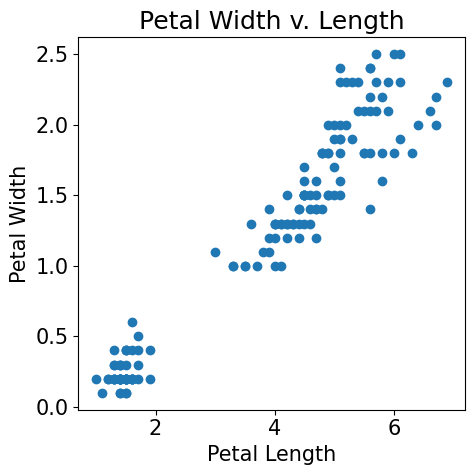

In [35]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()
plt.show()

In [62]:
# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(train.iloc[:, 2].values.reshape(120,1), train.iloc[:, 3])

LinearRegression()

In [63]:
# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


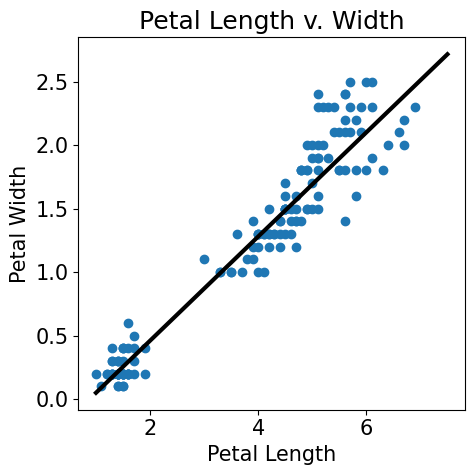

In [64]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.41*xvals - 0.36

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

In [74]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print(f'MSE: {mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict)}')

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f' % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04313478323495432
R2: 0.94


/home/dionicio/anaconda3/envs/platzi/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [75]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La última columna es la etiqueta de la especie..
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresión logística con el método de regresión logística de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

/home/dionicio/anaconda3/envs/platzi/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


In [77]:
# Un ejemplo de la matriz de confusión con sklearn
#Importamos el método de matriz de confusión desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicción generados.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

In [78]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción 
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


In [92]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 31.412885668276978
Centroids (x, y) =
 [[1.462      0.246     ]
 [4.29259259 1.35925926]
 [5.62608696 2.04782609]]


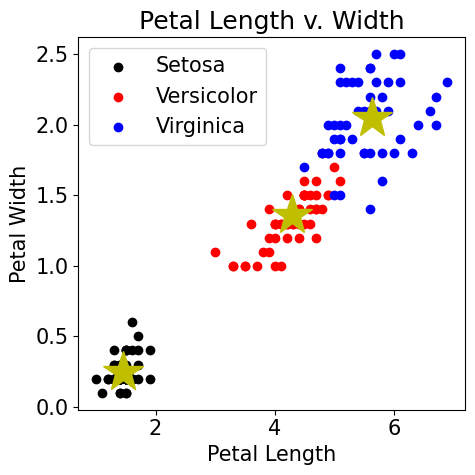

In [93]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "y*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()